In [ ]:
http://141.5.103.225/FXifHEhBpn/my_mota_motp.p http://141.5.103.225/POts0StvaW/trackastra_dfki_metrics.p

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
my = pickle.load( open( "my_mota_motp.p", "rb" ) )
ta = pickle.load( open( "trackastra_dfki_metrics.p", "rb" ) )

In [4]:
eval_bursts = list(sorted(list(my["adab19c177354497b76589a2_5800.pt"].keys())))
models = list(my.keys())

In [5]:
load_checkpoint = {
    # 10% - base
    "0bd8401af6304f72916144de_5900.pt": True,
    "e6d7158656ed44d396b38c4e_5900.pt": True,
    "4774ed98d2b94134a0a4992b_6000.pt": False,
    "adab19c177354497b76589a2_5800.pt": False,
    
    # 10% - large
    "06e4ae124093484fb610be95_3200.pt": True,
    "ed8a19b1f3014700b8f1ad59_3200.pt": True,
    "a9fdcd8de27e475585a3223e_2700.pt": False,
    "94d0c81037ca4dcc8fb2691a_3200.pt": False,

    # 100% - base
    "4a64556adc274b9daee10cd5_700.pt": True,
    "9bb907fb0ac04ffa94dd480f_700.pt": True,
    "f69713bf31b643ca9fd01116_700.pt": False,
    "8095272d72ea4061a6b17cb8_600.pt": False,

    # 100% - large
    "e268a2f942704c3c9be44822_300.pt": True,
    "ded11e6f55b946bbb2382cc0_300.pt": True,
    "adf6513975394978a3cfd7b0_300.pt": False,
    "645c5b113a114e8c994674a4_300.pt": False,
}

### Learning rate 1e-7

In [6]:
models_versus = {
    #("0bd8401af6304f72916144de_5900.pt", "4774ed98d2b94134a0a4992b_6000.pt"), #1e-6
    ("e6d7158656ed44d396b38c4e_5900.pt", "adab19c177354497b76589a2_5800.pt"), #1e-7

    #("06e4ae124093484fb610be95_3200.pt", "a9fdcd8de27e475585a3223e_2700.pt"), #1e-6
    ("ed8a19b1f3014700b8f1ad59_3200.pt", "94d0c81037ca4dcc8fb2691a_3200.pt"), #1e-7

    #("4a64556adc274b9daee10cd5_700.pt", "8095272d72ea4061a6b17cb8_600.pt"), #1e-6
    ("9bb907fb0ac04ffa94dd480f_700.pt", "f69713bf31b643ca9fd01116_700.pt"), #1e-7

    #("ded11e6f55b946bbb2382cc0_300.pt", "adf6513975394978a3cfd7b0_300.pt"), #1e-6
    ("e268a2f942704c3c9be44822_300.pt", "e268a2f942704c3c9be44822_300.pt"), #1e-7
}

In [7]:
arr = np.zeros((len(models_versus),6))

In [8]:
for idm, (a, b) in enumerate(models_versus):
    for bidx, burst in enumerate(eval_bursts):
        
        amota = my[a][burst]["motp"]
        bmota = my[b][burst]["motp"]

        arr[idm, bidx] = amota - bmota
        

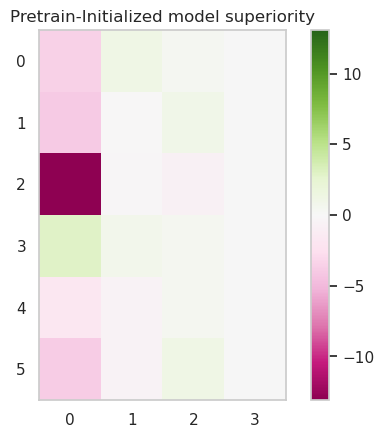

In [9]:
plt.imshow(arr.T, cmap="PiYG", vmin=-np.max(np.abs(arr)), vmax=np.max(np.abs(arr)))
plt.colorbar()
plt.title("Pretrain-Initialized model superiority");

### combined

In [10]:
from matplotlib.transforms import offset_copy

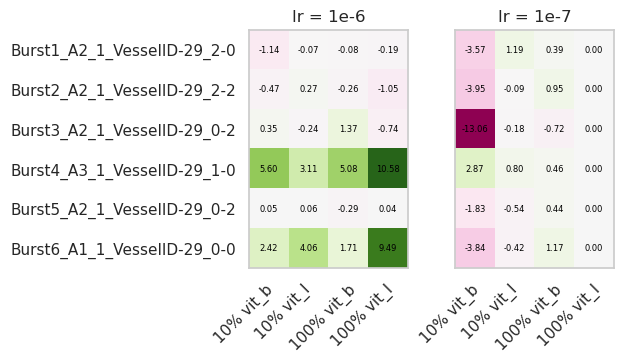

In [11]:
fig, ax = plt.subplots(1,2)

""" 1e-6 """

models_versus = {
    ("0bd8401af6304f72916144de_5900.pt", "4774ed98d2b94134a0a4992b_6000.pt"), #1e-6
    #("e6d7158656ed44d396b38c4e_5900.pt", "adab19c177354497b76589a2_5800.pt"), #1e-7

    ("06e4ae124093484fb610be95_3200.pt", "a9fdcd8de27e475585a3223e_2700.pt"), #1e-6
    #("ed8a19b1f3014700b8f1ad59_3200.pt", "94d0c81037ca4dcc8fb2691a_3200.pt"), #1e-7

    ("4a64556adc274b9daee10cd5_700.pt", "8095272d72ea4061a6b17cb8_600.pt"), #1e-6
    #("9bb907fb0ac04ffa94dd480f_700.pt", "f69713bf31b643ca9fd01116_700.pt"), #1e-7

    ("ded11e6f55b946bbb2382cc0_300.pt", "adf6513975394978a3cfd7b0_300.pt"), #1e-6
    #("e268a2f942704c3c9be44822_300.pt", "e268a2f942704c3c9be44822_300.pt"), #1e-7
}

arr = np.zeros((len(models_versus),6))

for idm, (a, b) in enumerate(models_versus):
    for bidx, burst in enumerate(eval_bursts):
        
        amota = my[a][burst]["motp"]
        bmota = my[b][burst]["motp"]

        arr[idm, bidx] = amota - bmota

im0 = ax.flat[0].imshow(arr.T, cmap="PiYG", vmin=-np.max(np.abs(arr)), vmax=np.max(np.abs(arr)))
ax.flat[0].set_title("lr = 1e-6");


ax.flat[0].set_xticks(np.arange(arr.shape[0]))
ax.flat[0].set_xticklabels(
    ["10% vit_b", "10% vit_l", "100% vit_b", "100% vit_l"],
    rotation=45
)

for label in ax.flat[0].get_xticklabels():
    # Adjust x offset by -5 dots (tweak this value as needed)
    new_transform = offset_copy(label.get_transform(), x=-25, y=0, units='dots')
    label.set_transform(new_transform)




ax.flat[0].set_yticks(ticks=np.arange(arr.shape[1]), labels=eval_bursts)

# For the first subplot (lr = 1e-6)
for (j, i), val in np.ndenumerate(arr.T):
    ax.flat[0].text(i, j, f"{val:.2f}", ha="center", va="center", color="black", size=6)


""" 1e-7 """

models_versus = {
    #("0bd8401af6304f72916144de_5900.pt", "4774ed98d2b94134a0a4992b_6000.pt"), #1e-6
    ("e6d7158656ed44d396b38c4e_5900.pt", "adab19c177354497b76589a2_5800.pt"), #1e-7

    #("06e4ae124093484fb610be95_3200.pt", "a9fdcd8de27e475585a3223e_2700.pt"), #1e-6
    ("ed8a19b1f3014700b8f1ad59_3200.pt", "94d0c81037ca4dcc8fb2691a_3200.pt"), #1e-7

    #("4a64556adc274b9daee10cd5_700.pt", "8095272d72ea4061a6b17cb8_600.pt"), #1e-6
    ("9bb907fb0ac04ffa94dd480f_700.pt", "f69713bf31b643ca9fd01116_700.pt"), #1e-7

    #("ded11e6f55b946bbb2382cc0_300.pt", "adf6513975394978a3cfd7b0_300.pt"), #1e-6
    ("e268a2f942704c3c9be44822_300.pt", "e268a2f942704c3c9be44822_300.pt"), #1e-7
}

arr = np.zeros((len(models_versus),6))

for idm, (a, b) in enumerate(models_versus):
    for bidx, burst in enumerate(eval_bursts):
        
        amota = my[a][burst]["motp"]
        bmota = my[b][burst]["motp"]

        arr[idm, bidx] = amota - bmota

im1 = ax.flat[1].imshow(arr.T, cmap="PiYG", vmin=-np.max(np.abs(arr)), vmax=np.max(np.abs(arr)))

ax.flat[1].set_title("lr = 1e-7");

ax.flat[1].set_xticks(np.arange(arr.shape[0]))
ax.flat[1].set_xticklabels(
    ["10% vit_b", "10% vit_l", "100% vit_b", "100% vit_l"],
    rotation=45
)

for label in ax.flat[1].get_xticklabels():
    # Adjust x offset by -5 dots (tweak this value as needed)
    new_transform = offset_copy(label.get_transform(), x=-25, y=0, units='dots')
    label.set_transform(new_transform)

ax.flat[1].set_yticks([], [])

#fig.colorbar(im0, ax=ax.flat[0], shrink=0.39)
#fig.colorbar(im0, ax=ax.flat[1], shrink=0.39)

for (j, i), val in np.ndenumerate(arr.T):
    ax.flat[1].text(i, j, f"{val:.2f}", ha="center", va="center", color="black", size=6)

plt.tight_layout()
plt.savefig("motp_superiority.pdf")